# Mice Protein Expression Analysis

**Author: YNKM**

***Date: 05/18/23***

For this particular analysis, we are going to perform:
1. Exploratory data analysis
2. Model training for classification (Machine and Deep Learning)
3. Batch effects

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load all pacakges for the above exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from mpl_toolkits import mplot3d

In [6]:
# load the data
df = pd.read_excel("./Data_Cortex_Nuclear.xls")
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


total number of missing values: 1396


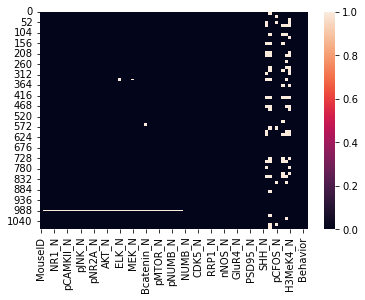

In [7]:
#count and visualize missing values
print('total number of missing values:',df.isnull().sum().sum())
sns.heatmap(df.isnull());

From the above heatmap we see there are too many missing values for us to simply delete the rows that contain them. We do not want to remove the columns that contain numerous missing values, because there are five such columns, and they may contain important information.

There are two options. One is to perform correlation analysis and see if the columns with many (>100) missing values correlate highly with columns that are complete, in which case we can delete them. Second, we can impute the missing values, which is what we will do here, but before we do that let's do some exploratory analysis.

## 1. Exploratory Data Analysis

In [8]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


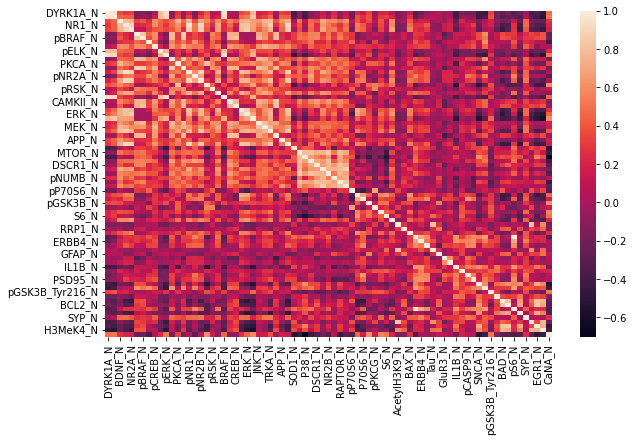

In [9]:
#correlation heatmap
plt.figure(figsize=(10,6));
sns.heatmap(df.corr());

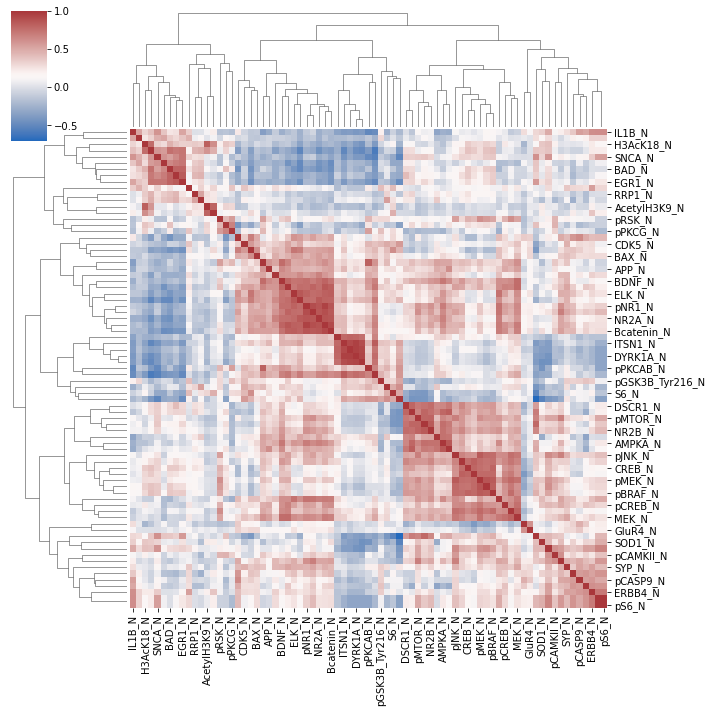

In [10]:
#clustermap
sns.clustermap(df.corr(),cmap='vlag');

Categorical features

In [11]:
# function to separate categorical from numeric features
def feature_types(df):
    categ = []
    numer = []
    for c in df.columns:
        if df[c].dtype == 'object': categ.append(c)
        else: numer.append(c)
    return categ, numer

In [12]:
#display information on categorical features
categ, numer = feature_types(df)
print('categorical features:',categ)
print('')

for f in categ[1:-1]:
    print('value counts of feature: {}'.format(f))
    #print('')
    print(df[f].value_counts())
    print('        ---------------')
    print('')

categorical features: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']

value counts of feature: Genotype
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
        ---------------

value counts of feature: Treatment
Memantine    570
Saline       510
Name: Treatment, dtype: int64
        ---------------

value counts of feature: Behavior
S/C    555
C/S    525
Name: Behavior, dtype: int64
        ---------------



number of classes:  8
class names:  ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


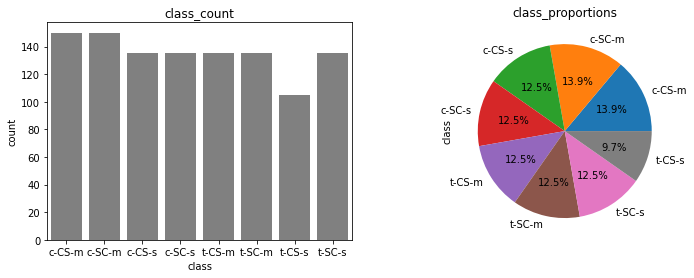

In [13]:
#information on classes
print('number of classes: ',df['class'].nunique())
print('class names: ', df['class'].unique())

plt.figure(figsize=(12,4));
plt.subplot(1,2,1);
plt.title('class_count');
sns.countplot(x='class', data=df, color='Grey');
plt.subplot(1,2,2);
plt.title('class_proportions');
df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%');

From the countplots below, we see that the classes are derived from the values of the categorical features. For example, class 'c-CS-m' means that the Genotype feature has value 'control', the Behavior feature has value 'C/S', and the Treatment feature has value 'memantine'. Therefore these features are encoded into the classes and we will not use them for model training.

Count Plots

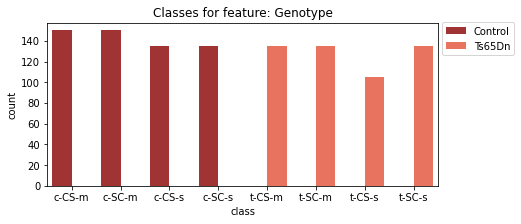

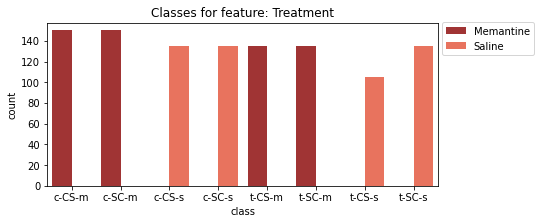

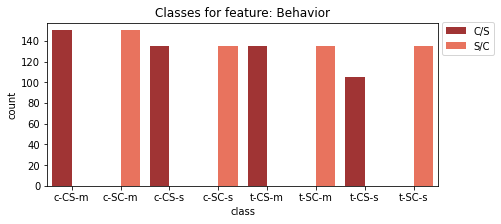

In [14]:
#visualize classes for categorical features
plt.figure(figsize=(7,3))
sns.countplot(x='class', data=df, hue='Genotype',palette=['firebrick','tomato']);
plt.legend(loc=(1.01,0.8));
plt.title('Classes for feature: Genotype');


plt.figure(figsize=(7,3))
sns.countplot(x='class', data=df, hue='Treatment',palette=['firebrick','tomato']);
plt.legend(loc=(1.01,0.8));
plt.title('Classes for feature: Treatment');

plt.figure(figsize=(7,3))
sns.countplot(x='class', data=df, hue='Behavior',palette=['firebrick','tomato']);
plt.legend(loc=(1.01,0.8));
plt.title('Classes for feature: Behavior');


Before we impute the data and train models for classification, let's visualize the non-null entries to see what they look like.

First, we will min-max scale them so they assume values for 0 to 1, then display the dataset as an image. Then, we will plot a PCA scatter. Finally, we will select the most important features and visualize their distributions.

In [15]:
# temporarily remove null-values and min-max scale data
from sklearn.preprocessing import MinMaxScaler

nonna=df.dropna(axis=1,thresh=901)
nonna=nonna.dropna(axis=0,how='any')
categ,numeri=feature_types(nonna)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(nonna[numeri].values)

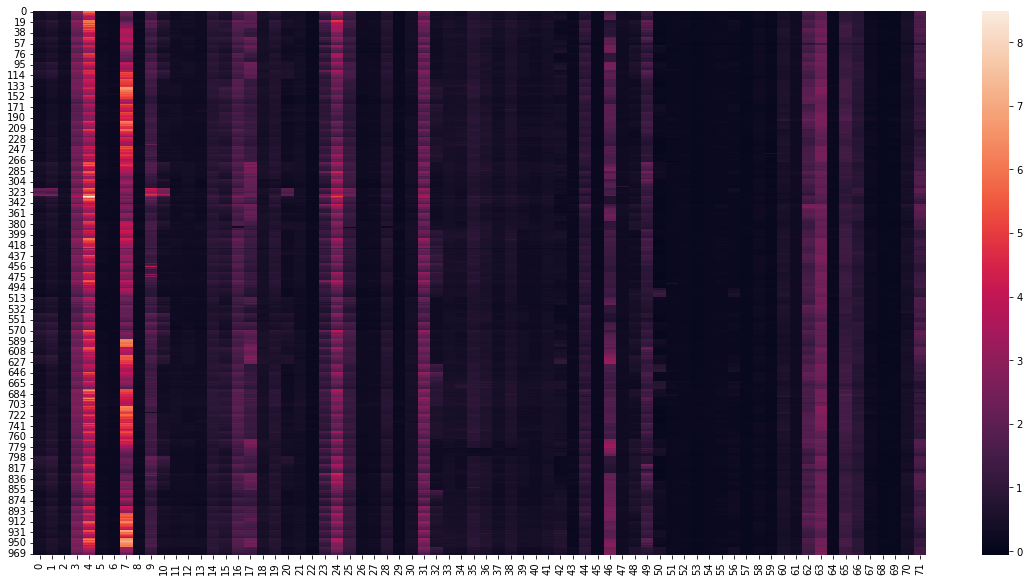

In [16]:
#display dataset as image
plt.figure(figsize=(20,10));
sns.heatmap(nonna[numeri].values);

PCA Visualization


In [17]:
from sklearn.decomposition import PCA

pca = PCA()
dec = pca.fit_transform(scaled)

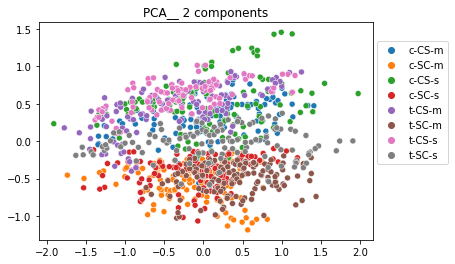

In [18]:
#2d scatterplot
sns.scatterplot(x=dec[:,0],y=dec[:,1],hue=nonna['class']);
plt.title('PCA__ 2 components')
plt.legend(loc=(1.01,0.35));

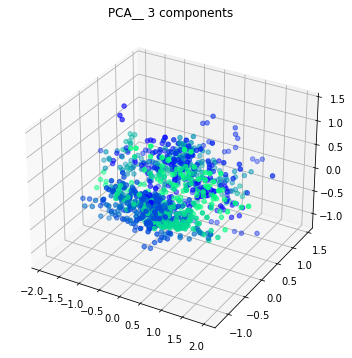

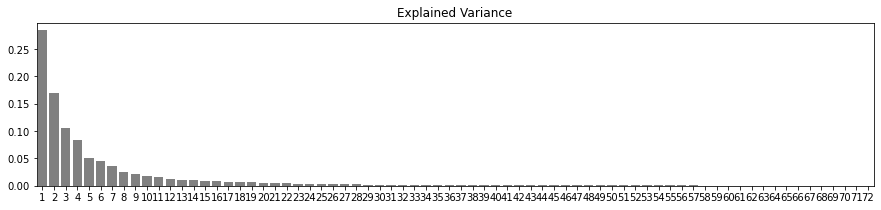

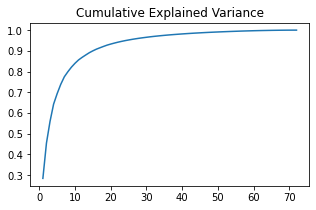

In [24]:
#3d scatterplot
from mpl_toolkits import mplot3d
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
labels = ordinal.fit_transform(nonna['class'].values[:,np.newaxis]).astype('int').squeeze()
plt.figure(figsize=(10,6));
ax = plt.axes(projection='3d');
ax.scatter(dec[:,0], dec[:,1], dec[:,2], c=labels, cmap='winter');
plt.title('PCA__ 3 components');

#explained variance
plt.figure(figsize=(15,3));
sns.barplot(x=np.arange(pca.explained_variance_ratio_.shape[0])+1, 
            y=pca.explained_variance_ratio_,color='Grey');
plt.title('Explained Variance');

#cumulative explained variance
plt.figure(figsize=(5,3));
sns.lineplot(x=np.arange(pca.explained_variance_ratio_.shape[0])+1, 
             y=pca.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance');

TSNE



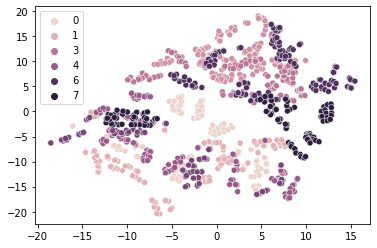

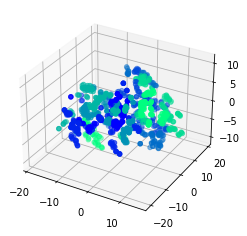

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=33)
ts = tsne.fit_transform(scaled)

sns.scatterplot(ts[:,0], ts[:,1],hue=labels);
plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(ts[:,0], ts[:,1], ts[:,2], c=labels, cmap='winter');

Other Dimensionality Reduction Methods

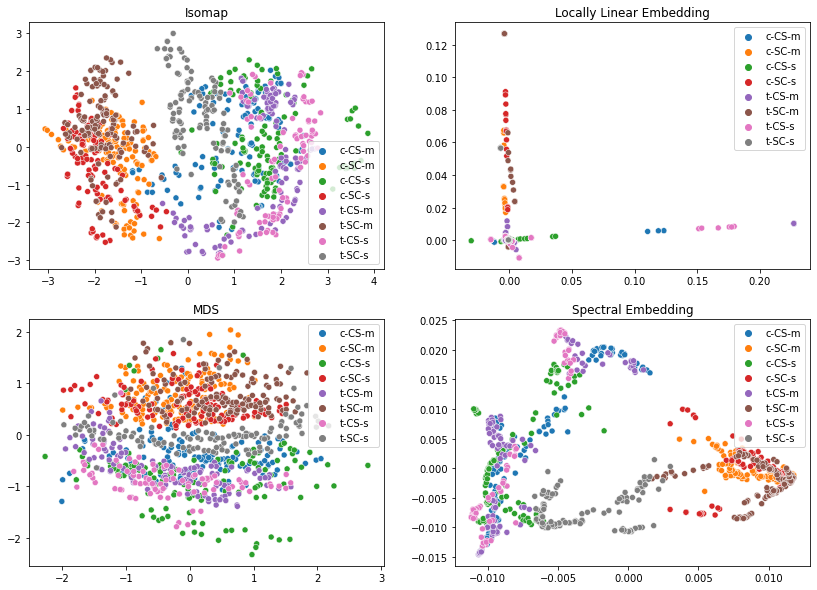

In [30]:
from sklearn.manifold import Isomap,LocallyLinearEmbedding,MDS,SpectralEmbedding

# Increase the number of neighbors for Isomap and SpectralEmbedding
iso = Isomap(n_neighbors=15, eigen_solver='arpack').fit_transform(scaled)
lle = LocallyLinearEmbedding().fit_transform(scaled)
mds = MDS().fit_transform(scaled)
se = SpectralEmbedding(n_neighbors=15, eigen_solver='arpack').fit_transform(scaled)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(x=iso[:,0],y=iso[:,1],hue=nonna['class']);
plt.legend(loc='best');
plt.title('Isomap');

plt.subplot(2,2,2)
sns.scatterplot(x=lle[:,0],y=lle[:,1],hue=nonna['class']);
plt.legend(loc='best');
plt.title('Locally Linear Embedding');

plt.subplot(2,2,3)
sns.scatterplot(x=mds[:,0],y=mds[:,1],hue=nonna['class']);
plt.legend(loc='best');
plt.title('MDS');

plt.subplot(2,2,4)
sns.scatterplot(x=se[:,0],y=se[:,1],hue=nonna['class']);
plt.legend(loc='best');
plt.title('Spectral Embedding');

Feature Selection and Exploration

In [31]:
#identify most important features via Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
labels = ordinal.fit_transform(nonna['class'].values[:,np.newaxis]).astype('int').squeeze()

forest = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=33)
forest.fit(scaled, labels)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=33)

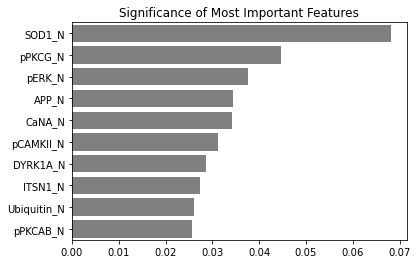

In [32]:
feats = np.argsort(forest.feature_importances_)[-10:]
plt.figure(figsize=(6,4));
sns.barplot(y=nonna[numeri].columns[feats][::-1], 
            x=forest.feature_importances_[feats][::-1], 
            color='Grey');
plt.title('Significance of Most Important Features');

The features are too many to plot all of them but, for demonstration purposes, we will pick the five most important features and visualize their distributions through pairgrids, violin plots, kde plots, and histograms.

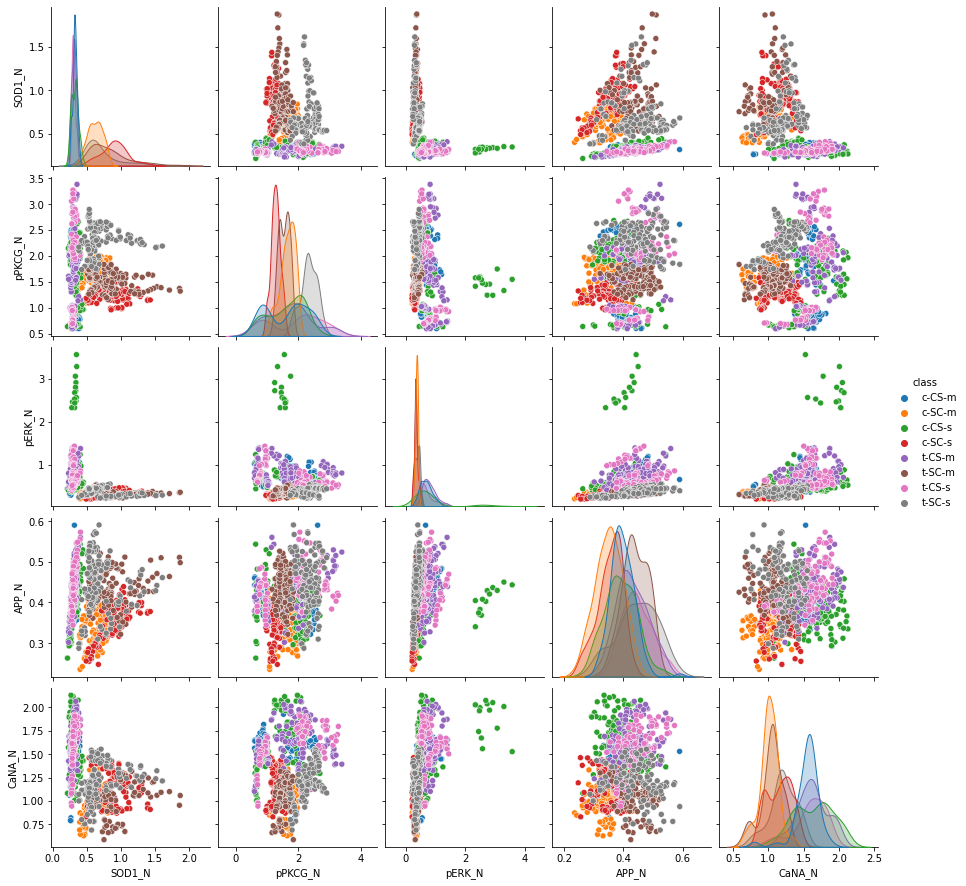

In [33]:
feats = ['SOD1_N', 'pPKCG_N', 'pERK_N', 'APP_N', 'CaNA_N']

#pairplot
sns.pairplot(nonna, vars=feats, hue='class');

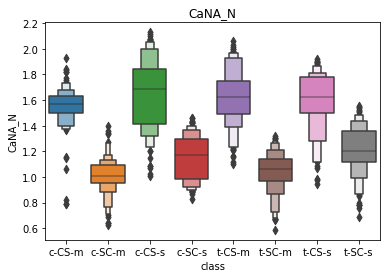

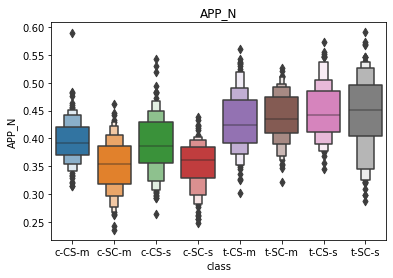

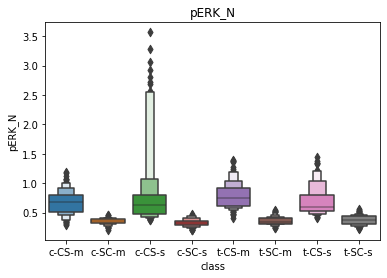

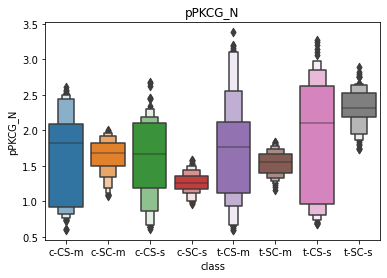

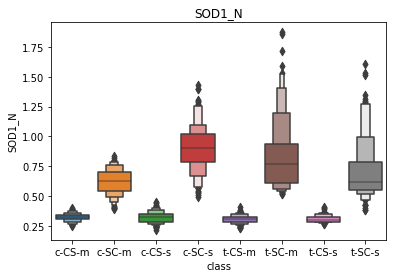

In [36]:
#boxenplots
for f in feats[::-1]:
    plt.figure(figsize=(6,4))
    sns.boxenplot(y=f, x='class', data=nonna);
    plt.title('{}'.format(f));

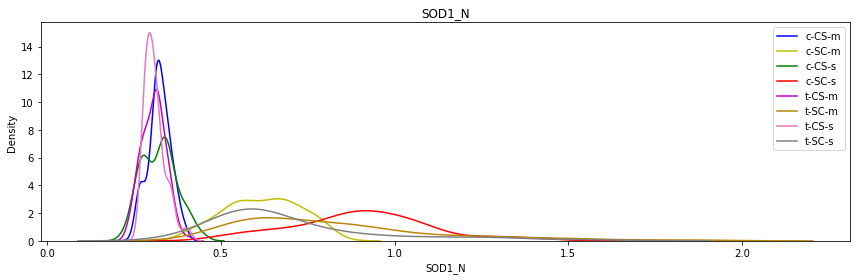

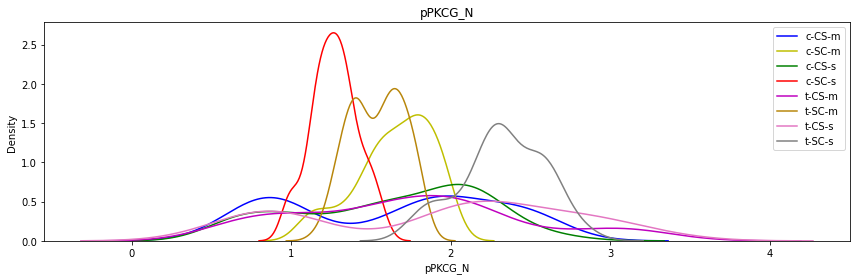

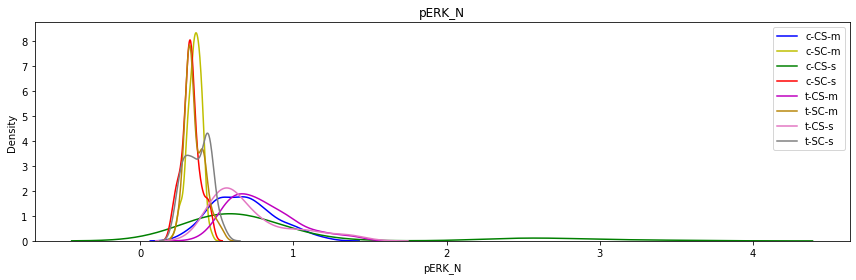

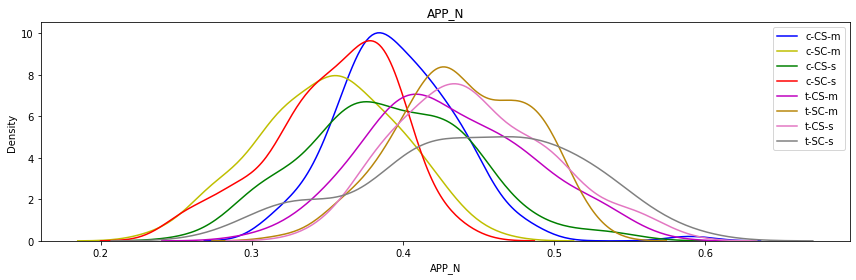

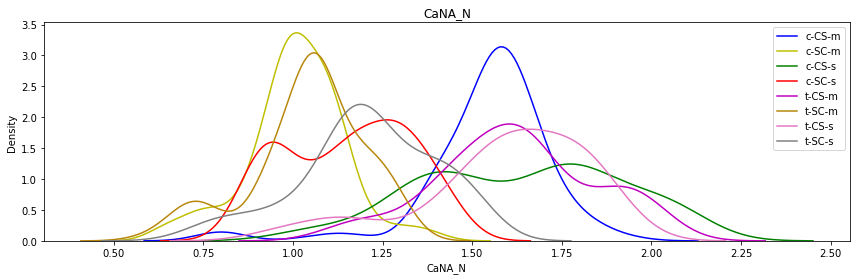

In [37]:
#kde plots of most important features
colors = ['b', 'y', 'g', 'r', 'm', 'darkgoldenrod', 'tab:pink', 'grey']
classes = nonna['class'].unique()

for f in feats:
    plt.figure(figsize=(12,4))
    for color, clas in zip(colors,classes):
        sns.distplot(nonna[nonna['class']==clas][f], hist=False, color=color, label=clas);
    plt.legend(loc='best');
    plt.title(f);
    plt.tight_layout();

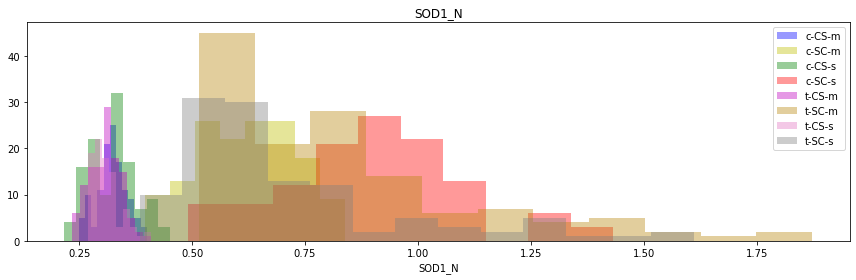

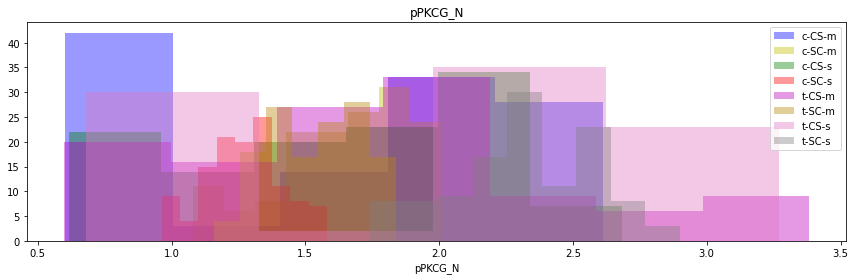

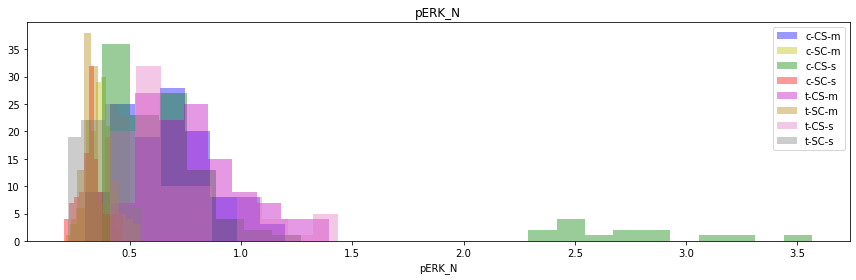

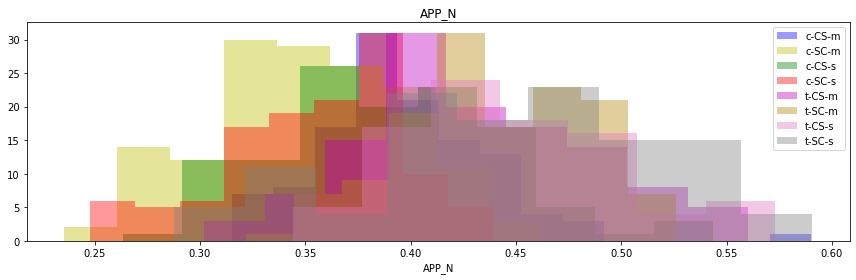

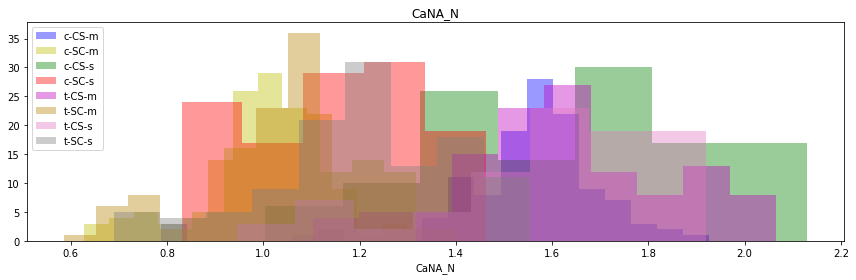

In [38]:
#distribution histograms of most important features
colors = ['b', 'y', 'g', 'r', 'm', 'darkgoldenrod', 'tab:pink', 'grey']
classes = nonna['class'].unique()

for f in feats:
    plt.figure(figsize=(12,4))
    for color, clas in zip(colors,classes):
        sns.distplot(nonna[nonna['class']==clas][f], kde=False, color=color, label=clas);
    plt.legend(loc='best');
    plt.title(f);
    plt.tight_layout();

We will try one more Feature Selection algorithm, namely chi-square test, and compare the results with Random Forrest

In [19]:
#compute chi2-selected features
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
labs = OE.fit_transform(nonna['class'].values[:,np.newaxis]).squeeze().astype('int')
s_feats = SelectKBest(chi2, k=10).fit(scaled,labs)

In [20]:
#create comparative dataframe
FS = pd.DataFrame([])
FS['Random Forest'] = pd.Series(df[numer].columns[np.argsort(forest.feature_importances_)[-10:]][::-1])
FS['chi2'] = pd.Series(df[numer].columns[np.argsort(s_feats.scores_)[-10:]][::-1])
FS

NameError: name 'forest' is not defined

These are the features both algorithms have in common in their selected ten most important features (they are seven):

In [42]:
FS[FS['Random Forest'].isin(FS['chi2'])]['Random Forest']

0         SOD1_N
2         pERK_N
4        pCFOS_N
5      pCAMKII_N
6       DYRK1A_N
8    Ubiquitin_N
9       pPKCAB_N
Name: Random Forest, dtype: object

## Classification Analysis

Preprocessing

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

x = df.loc[:,numer].values
y = df['class']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.loc[:,numer].dropna(how='any',inplace=False).values)
x = imp.transform(x)

minmax = MinMaxScaler()
x = minmax.fit_transform(x)

ordi = OrdinalEncoder()
y = ordi.fit_transform(y[:,np.newaxis]).squeeze().astype('int')
cat = ordi.categories_[0]

x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.1, random_state=33)

x_tr.shape,y_tr.shape,x_ts.shape,y_ts.shape

((972, 77), (972,), (108, 77), (108,))

Applying Machine Learning

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

results = {} #dictionary to store accuracy and f1-score of models

accuracy:   0.9722222222222222
f1_score:   0.9734543010752688



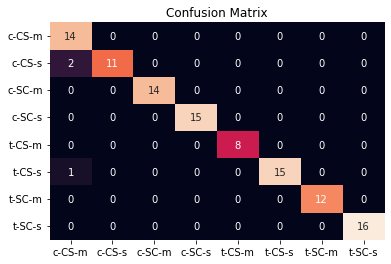

In [23]:
# KNN
knn = KNeighborsClassifier()
knn.fit(x_tr,y_tr)
pred_knn = knn.predict(x_ts)

acc_knn = accuracy_score(y_ts, pred_knn)
f1_knn = f1_score(y_ts, pred_knn, average='macro')
results['K-Nearest Neighbors'] = [acc_knn, f1_knn]

print('accuracy:  ', acc_knn)
print('f1_score:  ', f1_knn)
print('')

sns.heatmap(confusion_matrix(y_ts,pred_knn),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');


accuracy:   0.9722222222222222
f1_score:   0.9658564814814815



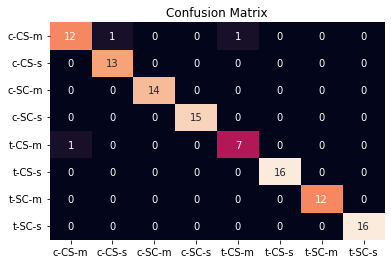

In [24]:
# LGR
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
pred_lr = lr.predict(x_ts)

acc_lr = accuracy_score(y_ts, pred_lr)
f1_lr = f1_score(y_ts, pred_lr, average='macro')
results['Logistic Regression'] = [acc_lr, f1_lr]

print('accuracy:  ', acc_lr)
print('f1_score:  ', f1_lr)
print('')

sns.heatmap(confusion_matrix(y_ts,pred_lr),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

accuracy:   1.0
f1_score:   1.0



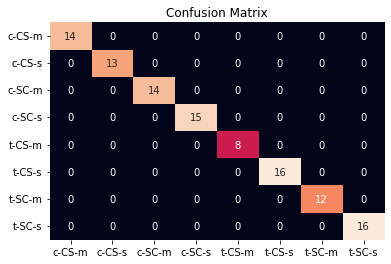

In [25]:
# RF
rf = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=33)
rf.fit(x_tr,y_tr)
pred_rf = rf.predict(x_ts)

acc_rf = accuracy_score(y_ts, pred_rf)
f1_rf = f1_score(y_ts, pred_rf, average='macro')
results['Random Forest'] = [acc_rf, f1_rf]

print('accuracy:  ', acc_rf)
print('f1_score:  ', f1_rf)
print('')

sns.heatmap(confusion_matrix(y_ts,pred_rf),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

accuracy:   0.9537037037037037
f1_score:   0.9563820617852876



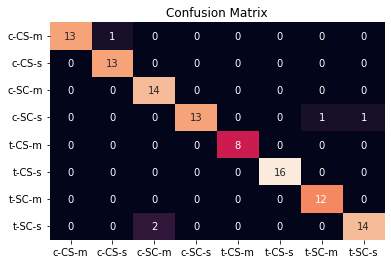

In [26]:
# GB
gb = GradientBoostingClassifier(n_estimators=1000,max_depth=5,random_state=33)
gb.fit(x_tr,y_tr)
pred_gb = gb.predict(x_ts)

acc_gb = accuracy_score(y_ts, pred_gb)
f1_gb = f1_score(y_ts, pred_gb, average='macro')
results['Gradient Boosting Tree'] = [acc_gb, f1_gb]

print('accuracy:  ', acc_gb)
print('f1_score:  ', f1_gb)
print('')

sns.heatmap(confusion_matrix(y_ts,pred_gb),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

accuracy:   0.8240740740740741
f1_score:   0.8183717456126911



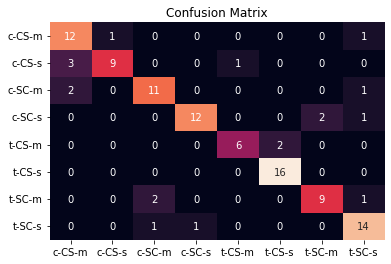

In [27]:
# DT
tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=1000,random_state=33)
ada.fit(x_tr,y_tr)
pred_ada = ada.predict(x_ts)

acc_ada = accuracy_score(y_ts, pred_ada)
f1_ada = f1_score(y_ts, pred_ada, average='macro')
results['AdaBoost Tree'] = [acc_ada, f1_ada]

print('accuracy:  ', acc_ada)
print('f1_score:  ', f1_ada)
print('')

sns.heatmap(confusion_matrix(y_ts,pred_ada),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');



Applying Deep Learning


## Batch Effects

Data pre-processing



In [30]:
# turn MouseID into a true multi-index
multi = pd.MultiIndex.from_tuples( [ tuple(s.split('_')) for s in df['MouseID'] ], names=('mouse_id','replicate_id') )
df = df.set_index(multi)

In [32]:
# pivot data frame to facilitate facet plotting
e = pd.DataFrame(df.stack())
e.index.names = ['mouse_id','replicate_id','protein']
e.reset_index(inplace=True)
e = e.rename( {0:'value'}, axis='columns' )
e['replicate_id'] = e['replicate_id'].astype(int)

In [33]:
# only keep protein expression columns
e = e[ ['_N' in s for s in e['protein']] ]

In [35]:
# summarize per mouse data (for reference)
df.drop([ c for c in df.columns if '_N' in c ],axis=1).groupby( level=0 ).head(1)

,,MouseID,Genotype,Treatment,Behavior,class
mouse_id,replicate_id,,,,,
309,1,309_1,Control,Memantine,C/S,c-CS-m
311,1,311_1,Control,Memantine,C/S,c-CS-m
320,1,320_1,Control,Memantine,C/S,c-CS-m
321,1,321_1,Control,Memantine,C/S,c-CS-m
322,1,322_1,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...
3513,1,3513_1,Ts65Dn,Saline,S/C,t-SC-s
3517,1,3517_1,Ts65Dn,Saline,S/C,t-SC-s
3525,1,3525_1,Ts65Dn,Saline,S/C,t-SC-s


In [36]:
# add log(expression).  This pulls out more information from the low expressors
e['log_ex'] = [ math.log(a+0.1) for a in e['value'] ]

**Plot protein expression levels by replicate ID for the first 6 control mice (all same treatment)**

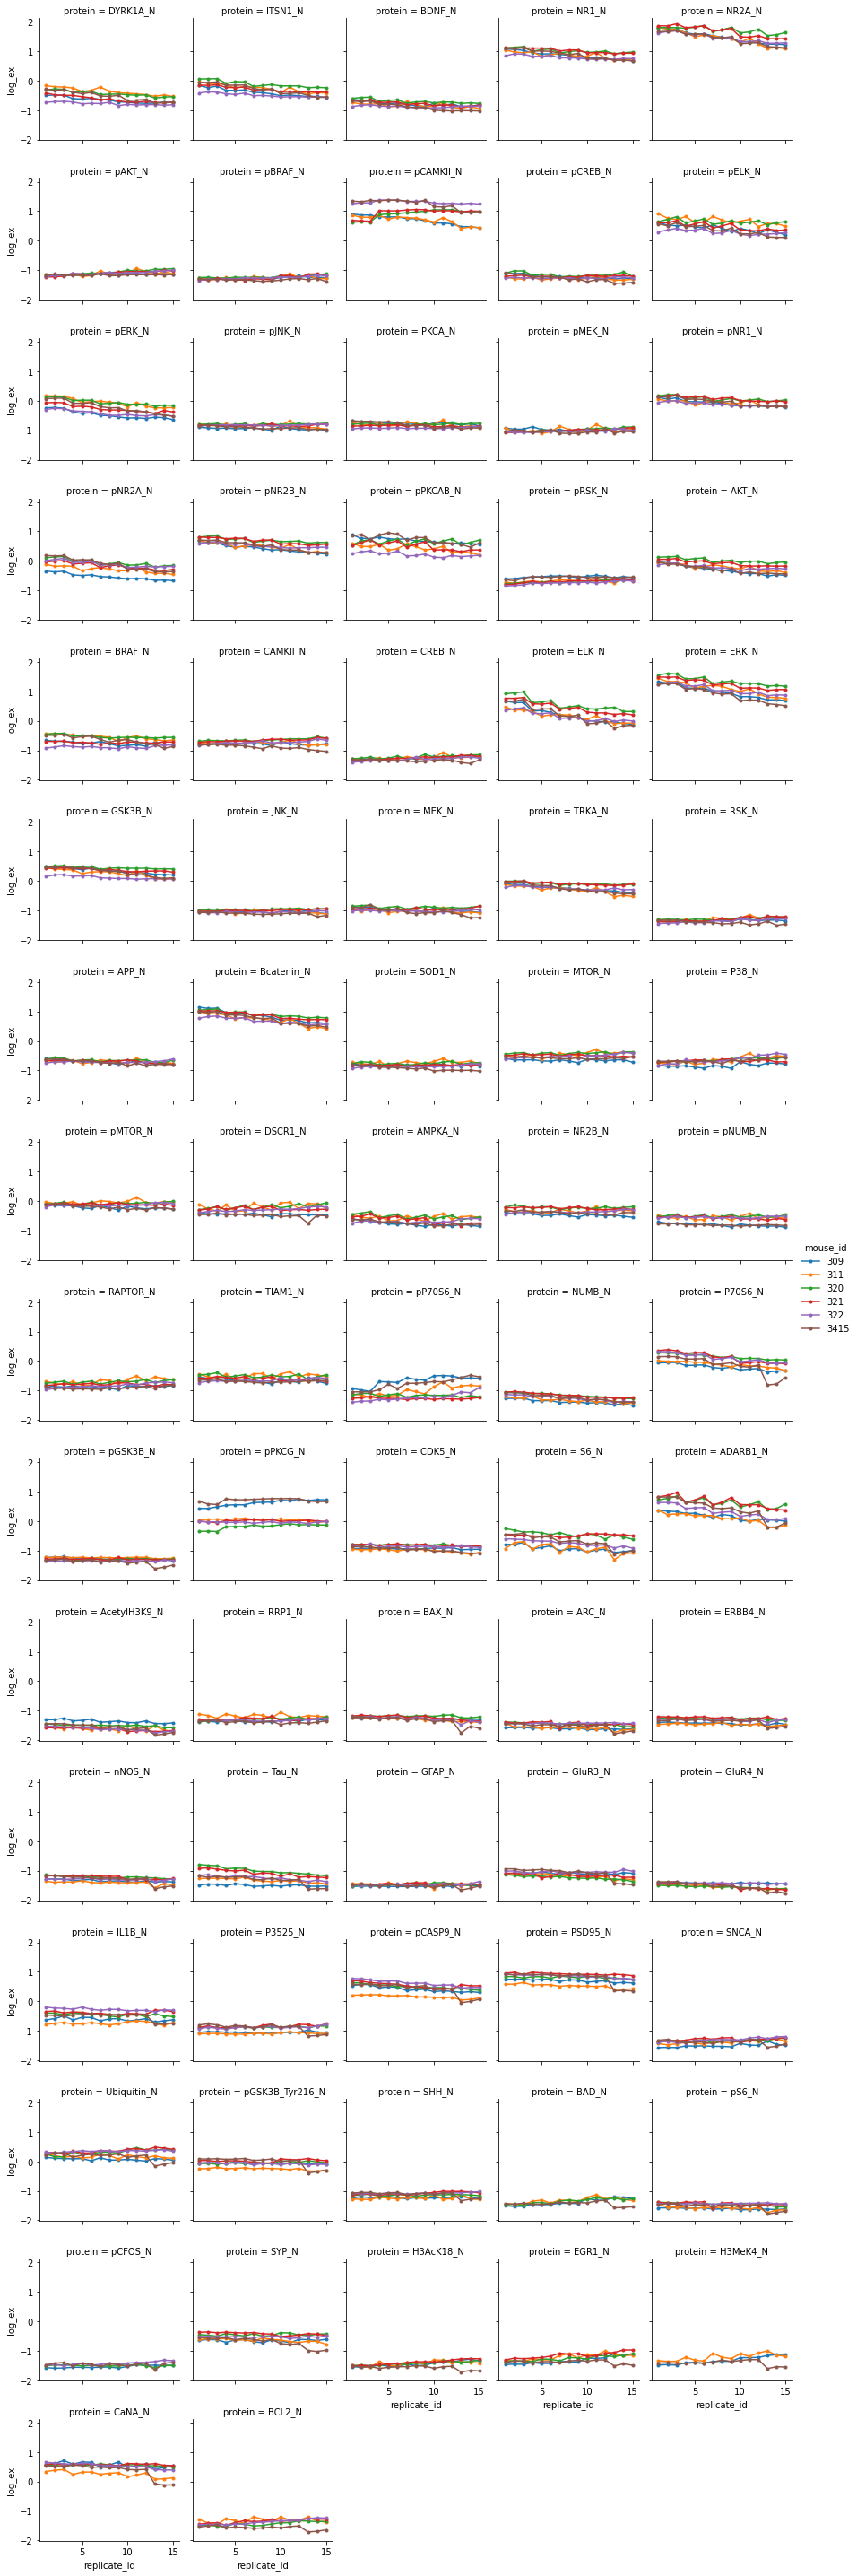

In [37]:
i = e['mouse_id'].isin(('309','311','320','321','322','3415'))
g = sns.FacetGrid(e[i], col="protein", hue='mouse_id', col_wrap=5, size=2.5)
g = g.map(plt.plot, "replicate_id", 'log_ex', marker=".").add_legend()

Notes:

* There's clearly a per-mouse effect. Some mice have systematically high/low protein levels. Suggests that normalizing by mouse id is warranted.

* There's clearly a per-replicate effect. There is a large subset of proteins where the expression level decreases or increases as a function of the replicate number.

* There's clearly a periodicity within the per-replicate effect. It looks like various protein curves follow a periodicity-3 pattern. We could call these triads a "replicate batch".

* Something went systematically wrong for the last three replicates of mouse 3415. This kind of observation would suggest that there's also a mouse_id * replicate_batch_id effect.

* Overall this brings serious questions to the utility of these replicates. The SOM analysis paper and the blurb at kaggle say that the replicates form independent measurements of the same protein response, but all of these observations make it clear that this is far from true. Without more information it's entirely unclear how to reduce the 15 replicates into a single measurement value. Our best hope is that the replicate effects are reproduced across all mice, and if we analyze replicates as separate experiments, we can recover some statistical power.

**Plot representative protein levels for every mouse across replication points**

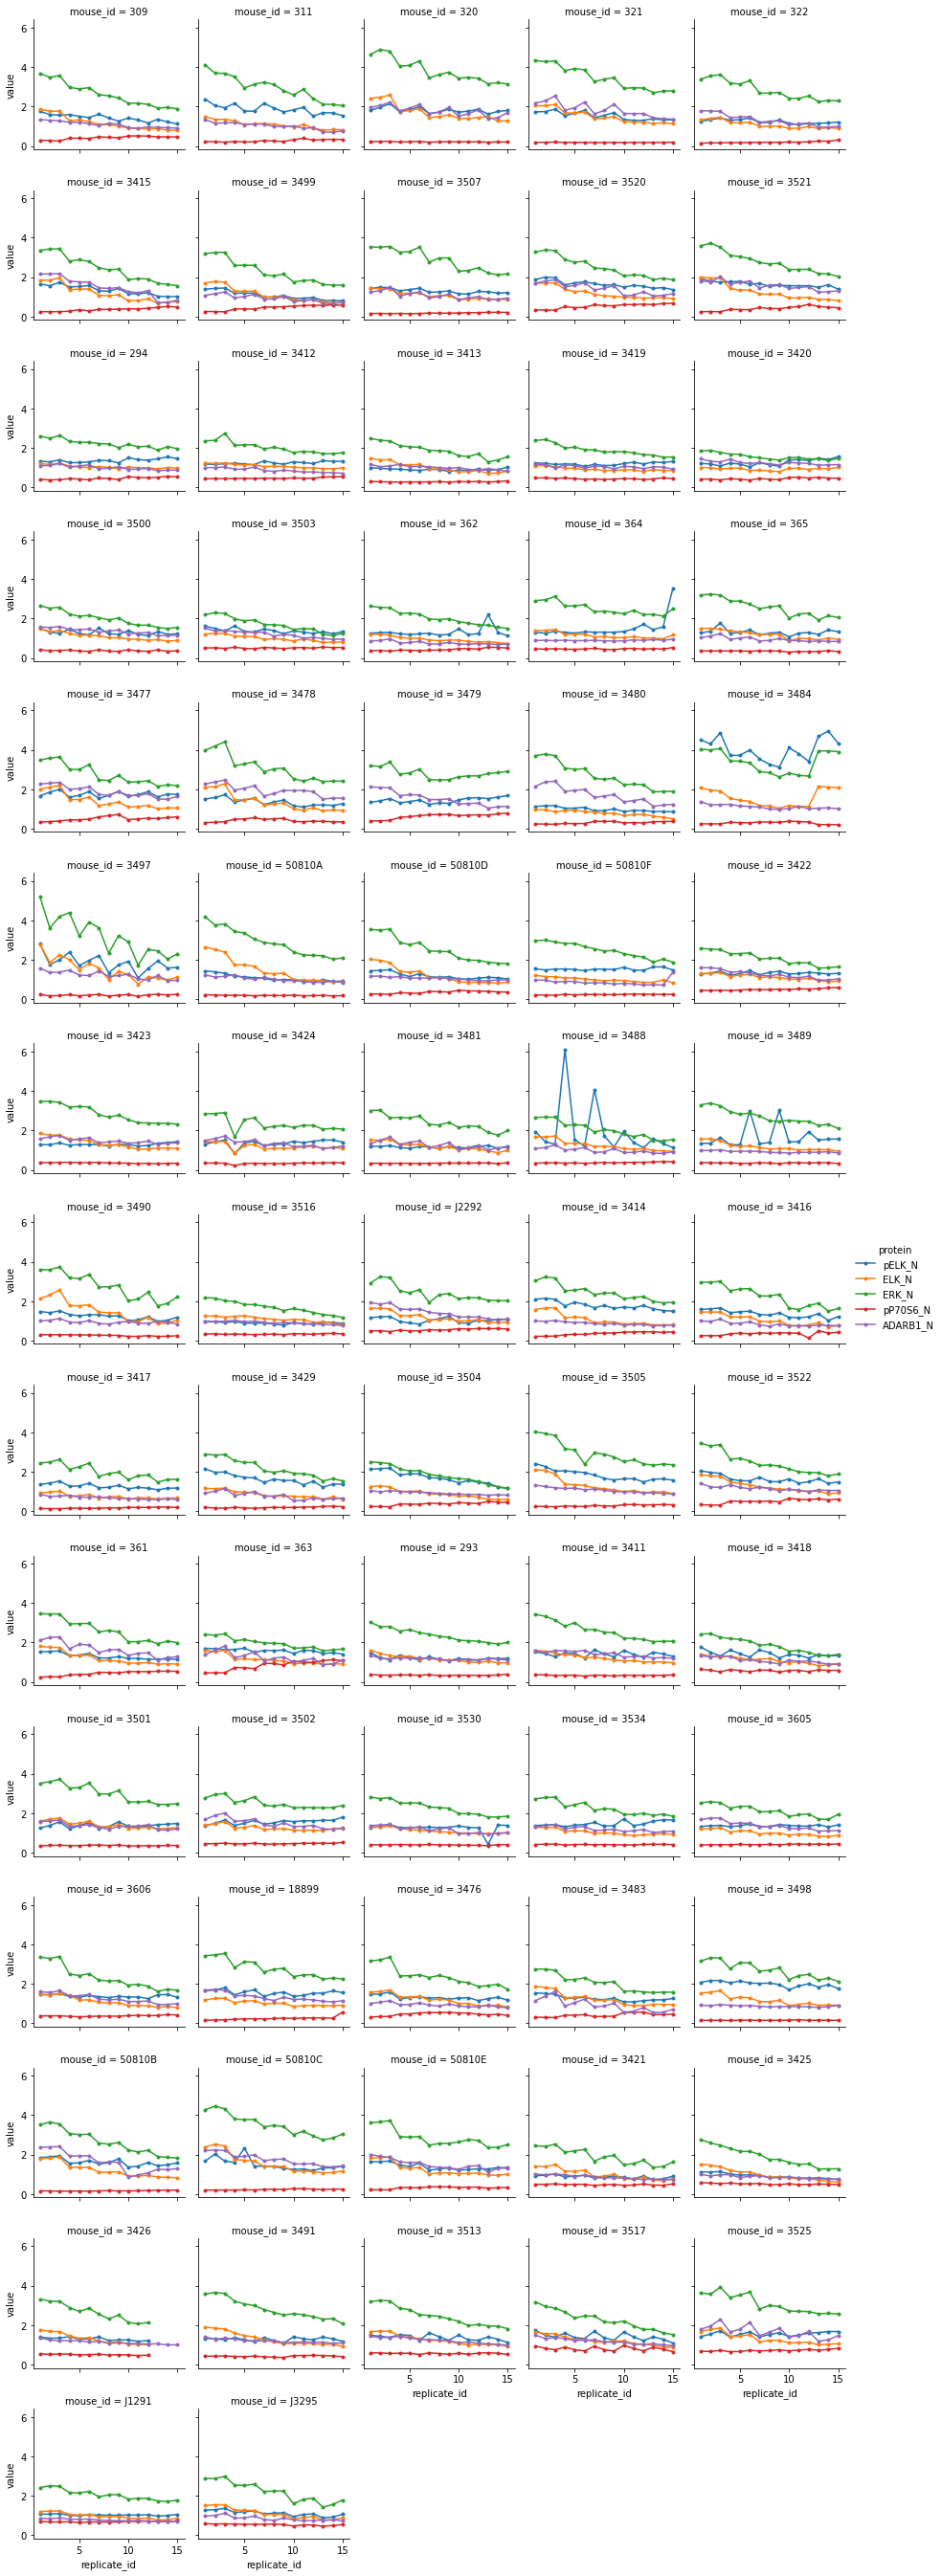

In [38]:
i = e['protein'].isin( ('ELK_N','ADARB1_N','pP70S6_N','ERK_N','pELK_N'))
g = sns.FacetGrid(e[i], col="mouse_id", hue='protein', col_wrap=5, size=2.5)
g = g.map(plt.plot, "replicate_id", 'value', marker=".").add_legend()

Notes:

* Every mouse repeats the same story that replicate_id is a dominant effect in the observed expression level.

* The replicate effects are mostly consistent across mice; this would permit a treatment where we analyze each replicate as a separate experiment. However, while the majority of mice exhibit the period-3 pattern, some mice don't show this and others have a phase offset in the period-3 behavior (e.g. 3497).
* While not as powerful as a full mixed-effects model, we might be able to proceed by considering each replicate as a separate experiment and requiring our putative correlations to be significant across a majority (or more) of the replicates.